# Storage QPI Report

In [2]:
%matplotlib inline
import json
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import qgrid

qgrid.nbinstall(overwrite=True)

RESULT_FILE = './storperf-master.json'
with open(RESULT_FILE, 'r') as f:
    result_data = json.load(f)
metrics = result_data['report']['metrics']

# TODO(yujunz) move common functiont to qtip package

def metrics_to_dataframe(metrics):
    """convert storperf metrics to DataFrame"""
    def _convert(metric, value):
        columns = metric.split('.')
        return {
            'workload_name': columns[0],
            'queue_depth': columns[2],
            'block_size': columns[4],
            'read_write': columns[5],
            'metric_name': ('.').join(columns[6:]),
            'value': value
        }

    return pd.DataFrame([_convert(*p) for p in metrics.items()])

def get_metric(metric_name):
    return df[df.metric_name == metric_name]

def plot_metric(metric_name):
    df_metric = get_metric(metric_name)
    fig = plt.figure(figsize=(16,9))

    ax = fig.add_subplot(111, projection='3d')
    for wl, rw, c in zip(['rw', 'rw', 'wr', 'rr'], ['read', 'write', 'write', 'read'], ['r', 'g', 'b', 'y']):
        _df = df_metric[(df_metric.workload_name == wl) & (df_metric.read_write == rw)]
        ax.scatter(_df.block_size, _df.queue_depth, _df['value'], c=c, label='{}.{}'.format(wl, rw))

    ax.set_xlabel('block size')
    ax.set_ylabel('queue depth')
    ax.set_zlabel(metric_name)
    ax.legend()

df = metrics_to_dataframe(metrics)

# filter invalid data
df = df[(df.workload_name != '_warm_up') & (df.value != 0.0)]
df.block_size = df.block_size.astype(int)
df.queue_depth = df.queue_depth.astype(int)

## Test Results

### Bandwidth

In [3]:
get_metric('bw')

,block_size,metric_name,queue_depth,read_write,value,workload_name
13,16384,bw,4,write,507.900000,wr
14,2048,bw,1,read,3290.425000,rr
15,16384,bw,4,write,1853.916667,rw
18,16384,bw,1,write,670.450000,rw
20,16384,bw,1,write,284.125000,wr
23,2048,bw,4,read,17949.100000,rr
25,2048,bw,1,write,86.450000,rw
31,2048,bw,4,write,30.975000,wr
35,2048,bw,4,read,616.812500,rw
40,16384,bw,1,read,23140.200000,rr


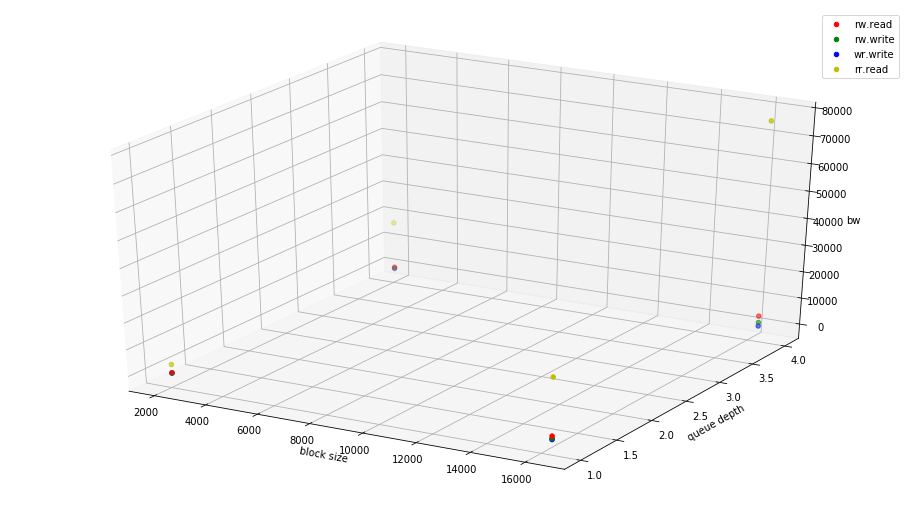

In [3]:
plot_metric('bw')

### IOPS

In [9]:
get_metric('iops')

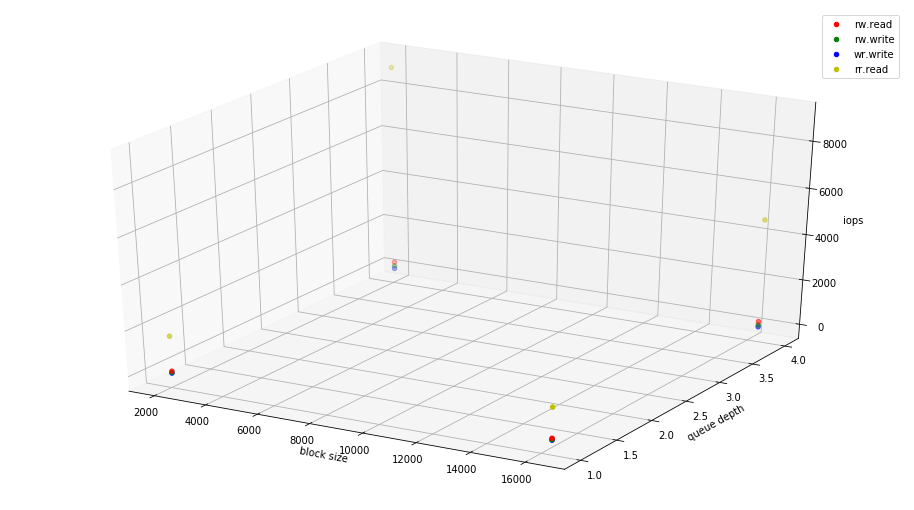

In [5]:
plot_metric('iops')

### Latency

In [4]:
get_metric('lat.mean')

,block_size,metric_name,queue_depth,read_write,value,workload_name
0,2048,lat.mean,4,read,741.592917,rw
3,2048,lat.mean,1,write,76441.214250,wr
6,16384,lat.mean,4,read,802.741458,rw
26,16384,lat.mean,4,read,840.987750,rr
28,2048,lat.mean,4,write,28466.222083,rw
34,2048,lat.mean,4,write,253079.296750,wr
37,2048,lat.mean,4,read,445.572250,rr
43,16384,lat.mean,1,read,719.534750,rw
53,16384,lat.mean,1,write,22165.340000,rw
54,2048,lat.mean,1,read,644.558000,rw


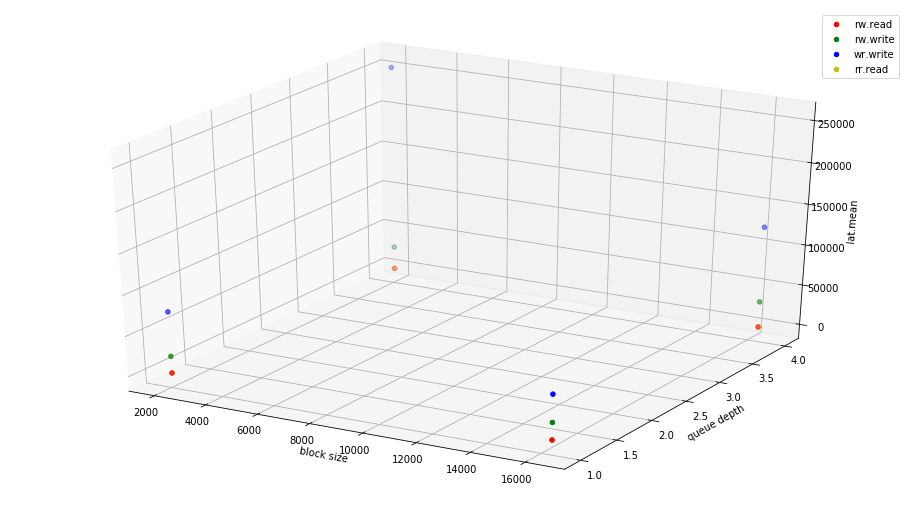

In [7]:
plot_metric('lat.mean')

## System Information

### Hardware

TBD

### Software

TBD

## Test Configuration

TBD